# ICE plots - sklearn

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)


In this notebook we will use Scikit-learn to create ICE plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.inspection import PartialDependenceDisplay

### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

## Random Forest

In [4]:
# fit model

rf = RandomForestRegressor(
    criterion="squared_error",
    n_estimators=25,
    max_depth=3,
    random_state=3,
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=25, random_state=3)

In [5]:
# R2 in train set

rf.score(X_train, y_train)

0.5678528672984874

In [6]:
# R2 in test set

rf.score(X_test, y_test)

0.5402067932087679

The model explains > 50% of the variability in the target variable.

## Tree derived feature importance

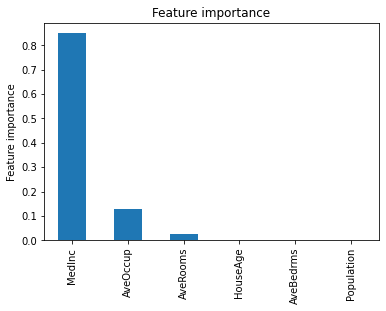

In [7]:
# random forest importance

global_exp = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)

global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance")
plt.show()

## Partial dependence plots

In [8]:
# The features used in the model

rf.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'], dtype=object)

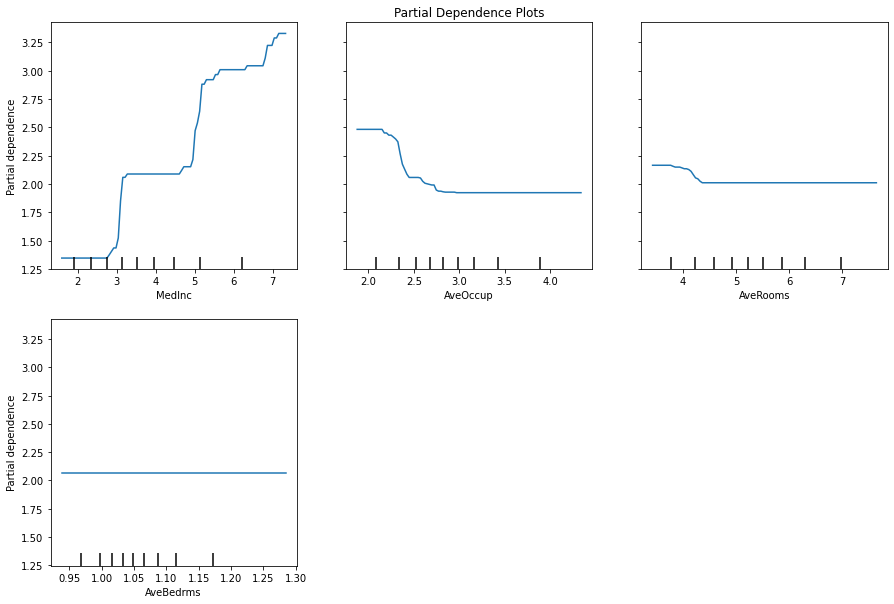

In [9]:
# PDP for a mix of numerical and categorical features

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")

PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0, 5, 2, 3), # the features to plot
    random_state=5,
    ax=ax,
)

plt.show()

The house price increases with MedInc. We see the staggered increase typical of decision tree based models.

The house price decreases with the average house occupancy up to a certain level and then it does not decrease any further.

The average number of bedrooms does not affect the house price.

## ICE plots

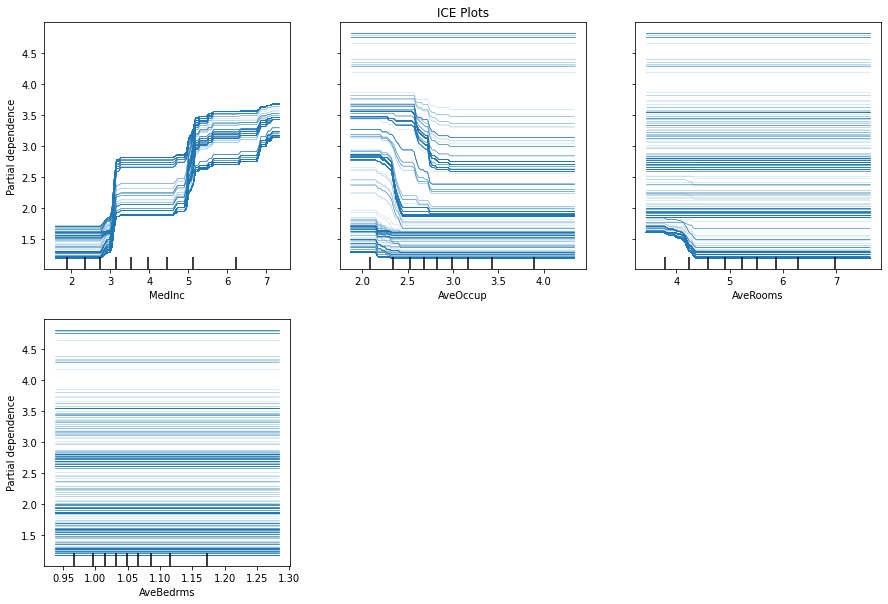

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("ICE Plots")

PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0, 5, 2, 3), # the features to plot
    kind = "individual",
    random_state=5,
    ax=ax,
)

plt.show()

**Note**: It's not possible to display ICE for categorical features with sklearn.

With ICEs we see something interesting:

MedInc seems not to ineract with other variables. The curves are very similar.

AveOccup seems to decrease abruptly the price of medium value houses, but not those of high value or low value.

AveRooms seems to decrease the price of low value houses, but has no effect on high value houses.

## PDP and ICE

In ICE plots it might not be easy to see the average effect of the input feature of interest. Hence, it is recommended to use ICE plots alongside PDPs.

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


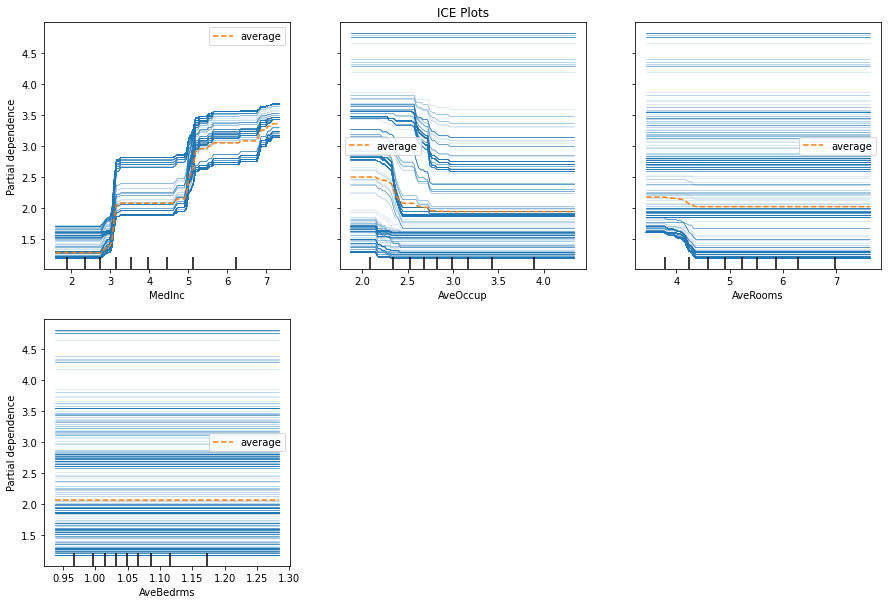

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("ICE Plots")

PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0, 5, 2, 3),  # the features to plot
    kind="both",
    random_state=5,
    ax=ax,
)

plt.show()

## Centered ICE plots

With too many lines in an ICE plot, it can be difficult to see differences between individual samples and interpret the model. 

Centering the ICE at the first value on the x-axis, produces centered Individual Conditional Expectation (cICE) plots.

cICE plots allow us to see the divergence of individual conditional expectations from the mean line, thus making it easier to explore heterogeneous relationships, if any.

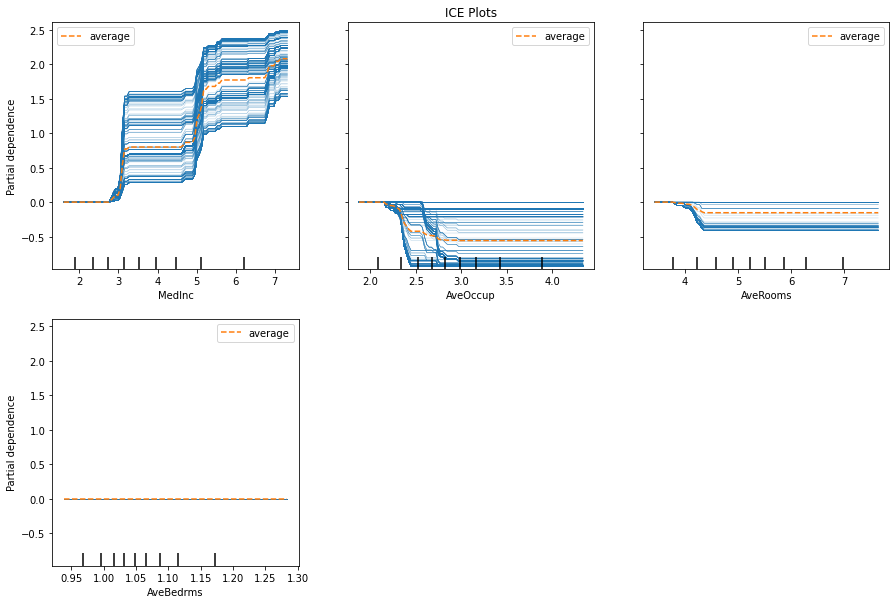

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("ICE Plots")

PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0, 5, 2, 3),  # the features to plot
    kind="both",
    centered=True,
    random_state=5,
    ax=ax,
)

plt.show()

That's it for this notebook.